In [55]:
#importing libraries
import os 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import folium 
from folium import Marker , GeoJson , Choropleth , Circle
from folium.plugins import HeatMap , MarkerCluster
import librosa.display 
from IPython.display import Audio

Read the data file

In [2]:
df =pd.read_csv("/kaggle/input/birdsong-recognition/train.csv")

In [3]:
df.head()

,rating,playback_used,ebird_code,channels,date,pitch,duration,filename,speed,species,...,xc_id,url,country,author,primary_label,longitude,length,time,recordist,license
0,3.5,no,aldfly,1 (mono),2013-05-25,Not specified,25,XC134874.mp3,Not specified,Alder Flycatcher,...,134874,https://www.xeno-canto.org/134874,United States,Jonathon Jongsma,Empidonax alnorum_Alder Flycatcher,-92.962,Not specified,8:00,Jonathon Jongsma,Creative Commons Attribution-ShareAlike 3.0
1,4.0,no,aldfly,2 (stereo),2013-05-27,both,36,XC135454.mp3,both,Alder Flycatcher,...,135454,https://www.xeno-canto.org/135454,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...
2,4.0,no,aldfly,2 (stereo),2013-05-27,both,39,XC135455.mp3,both,Alder Flycatcher,...,135455,https://www.xeno-canto.org/135455,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...
3,3.5,no,aldfly,2 (stereo),2013-05-27,both,33,XC135456.mp3,both,Alder Flycatcher,...,135456,https://www.xeno-canto.org/135456,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...
4,4.0,no,aldfly,2 (stereo),2013-05-27,both,36,XC135457.mp3,level,Alder Flycatcher,...,135457,https://www.xeno-canto.org/135457,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...


Lets check the class distribution of the data

In [4]:
df["species"].value_counts()

species
Myrtle Warbler               100
Alder Flycatcher             100
Yellow-bellied Flycatcher    100
Song Sparrow                 100
Sora                         100
                            ... 
LeConte's Thrasher            20
Hooded Merganser              19
Costa's Hummingbird           19
Bufflehead                    15
Redhead                        9
Name: count, Length: 264, dtype: int64

The data is highly imbalanced as we can see some of the speicies audio files are less compared to some other

visualize the data 


In [5]:
df["year"] = df["date"].apply(lambda x : x.split("-")[0])
df["month"] = df["date"].apply(lambda x : x.split("-")[1])
group_year = df.groupby(["year"]).size().reset_index(name = "counts")
group_year = group_year.iloc[3:]
group_month = df.groupby(["month"]).size().reset_index(name = "counts")

In [6]:
df

,rating,playback_used,ebird_code,channels,date,pitch,duration,filename,speed,species,...,country,author,primary_label,longitude,length,time,recordist,license,year,month
0,3.5,no,aldfly,1 (mono),2013-05-25,Not specified,25,XC134874.mp3,Not specified,Alder Flycatcher,...,United States,Jonathon Jongsma,Empidonax alnorum_Alder Flycatcher,-92.962,Not specified,8:00,Jonathon Jongsma,Creative Commons Attribution-ShareAlike 3.0,2013,05
1,4.0,no,aldfly,2 (stereo),2013-05-27,both,36,XC135454.mp3,both,Alder Flycatcher,...,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...,2013,05
2,4.0,no,aldfly,2 (stereo),2013-05-27,both,39,XC135455.mp3,both,Alder Flycatcher,...,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...,2013,05
3,3.5,no,aldfly,2 (stereo),2013-05-27,both,33,XC135456.mp3,both,Alder Flycatcher,...,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...,2013,05
4,4.0,no,aldfly,2 (stereo),2013-05-27,both,36,XC135457.mp3,level,Alder Flycatcher,...,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...,2013,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21370,4.5,no,yetvir,1 (mono),2019-05-15,both,28,XC477608.mp3,level,Yellow-throated Vireo,...,United States,Sue Riffe,Vireo flavifrons_Yellow-throated Vireo,-84.0131,0-3(s),13:00,Sue Riffe,Creative Commons Attribution-NonCommercial-Sha...,2019,05
21371,3.5,no,yetvir,1 (mono),2017-05-14,Not specified,52,XC500348.mp3,Not specified,Yellow-throated Vireo,...,United States,Jacob Saucier,Vireo flavifrons_Yellow-throated Vireo,-77.3422,Not specified,15:00,Jacob Saucier,Creative Commons Attribution-NonCommercial-Sha...,2017,05
21372,5.0,no,yetvir,1 (mono),2017-06-10,Not specified,96,XC501230.mp3,Not specified,Yellow-throated Vireo,...,United States,Jacob Saucier,Vireo flavifrons_Yellow-throated Vireo,-77.3422,Not specified,13:30,Jacob Saucier,Creative Commons Attribution-NonCommercial-Sha...,2017,06
21373,3.5,no,yetvir,2 (stereo),2009-05-06,level,35,XC54828.mp3,level,Yellow-throated Vireo,...,United States,Mike Nelson,Vireo flavifrons_Yellow-throated Vireo,-83.9462,>10(s),9:45am,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...,2009,05


In [7]:
fig = make_subplots(rows=2, cols=1, subplot_titles = ('Number of recordings according to year', 'Number of recordings according to month'))

fig.append_trace(go.Bar(
    x=group_year['year'],
    y=group_year['counts'],
    #tickmode='linear'
), row=1, col=1)

fig.append_trace(go.Bar(
    x=group_month['month'],
    y=group_month['counts'],
), row=2, col=1)



fig.update_layout(height=1000, width=700, showlegend=False,  xaxis = dict(
        tickmode = 'linear',
    ), xaxis2 = dict(tickmode='linear'))
fig.show()

Lets see how the data distributed

In [8]:
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]], subplot_titles=('Distribution of Channels', 'Distribution of Sampling rate'))

group_ch = df.groupby(["channels"]).size().reset_index(name = "counts")
fig.append_trace(go.Pie(labels = group_ch["channels"] , 
                       values = group_ch["counts"],),
                row = 1 , col =1)
group_sr = df.groupby(["sampling_rate"]).size().reset_index(name = "counts")
fig.append_trace(go.Pie(labels = group_sr["sampling_rate"] , 
                       values = group_sr["counts"],),
                row = 1 , col =2)

In [9]:
fig.show()

In [11]:
audio_path = '/kaggle/input/birdsong-recognition/train_audio/amebit/XC130058.mp3'
x, sr = librosa.load(audio_path)
Audio(x, rate=sr)

Lets see how this audio looks likes

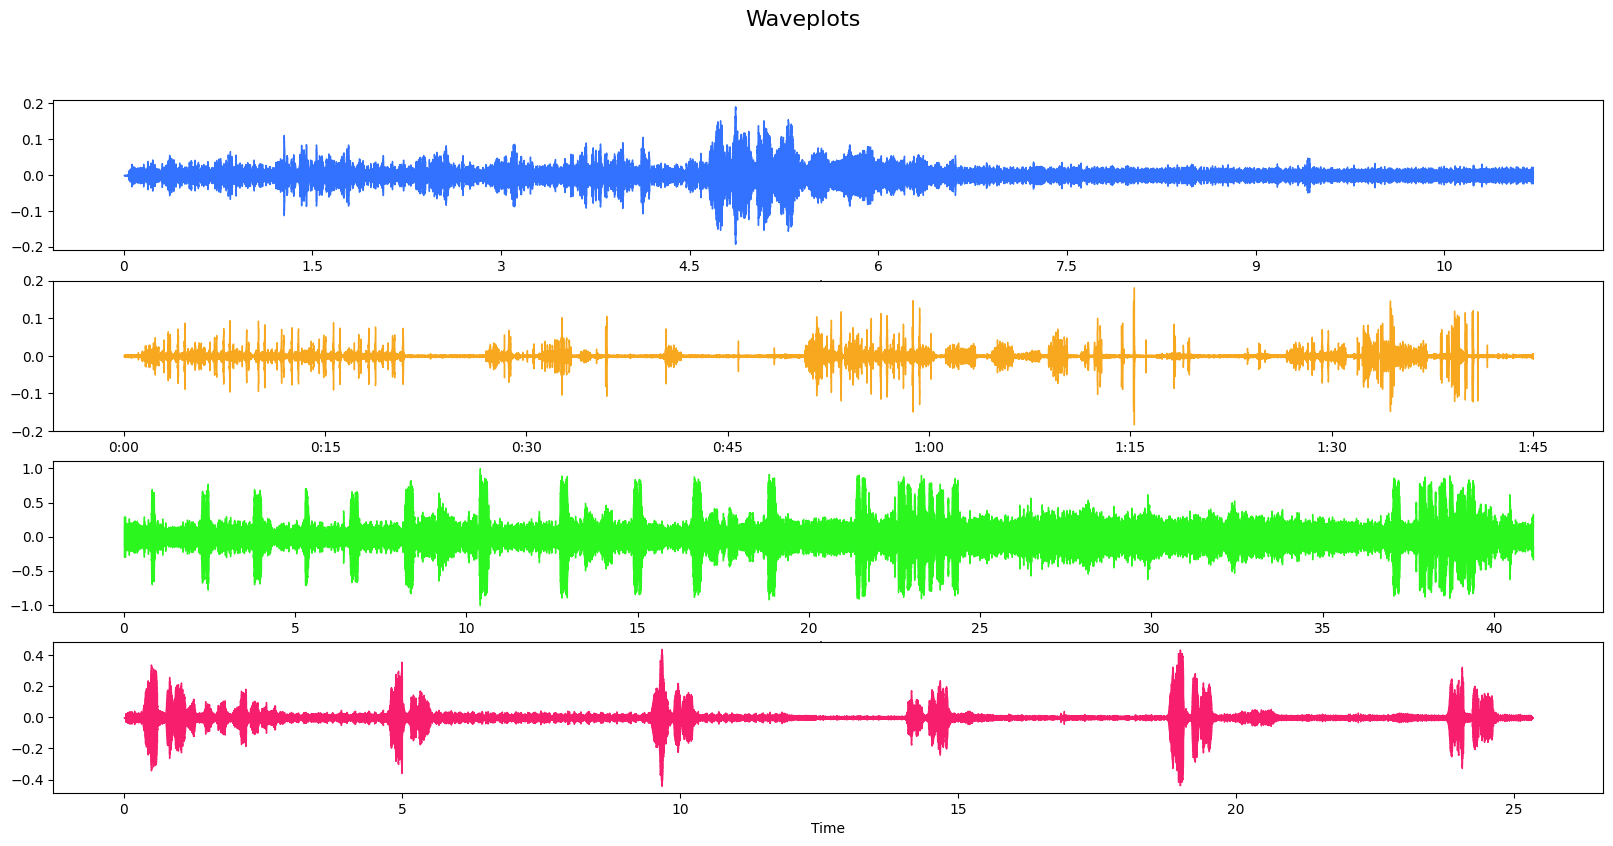

In [13]:
!pip install --upgrade librosa

fig, ax = plt.subplots(4, figsize = (20, 9))
fig.suptitle('Waveplots', fontsize=16)
audio_path1 = '/kaggle/input/birdsong-recognition/train_audio/amekes/XC214257.mp3'
audio_path2 = '/kaggle/input/birdsong-recognition/train_audio/annhum/XC120842.mp3'
audio_path3 = '/kaggle/input/birdsong-recognition/train_audio/balori/XC16971.mp3'
audio_path4 = '/kaggle/input/birdsong-recognition/train_audio/bkcchi/XC135477.mp3'

y1, sr1 = librosa.load(audio_path1)
y2, sr2 = librosa.load(audio_path2)
y3, sr3 = librosa.load(audio_path3)
y4, sr4 = librosa.load(audio_path4)

librosa.display.waveshow(y=y1, sr=sr1, color = "#3371FF", ax=ax[0])
librosa.display.waveshow(y=y2 , sr=sr2, color = "#F7A81E", ax=ax[1])
librosa.display.waveshow(y=y3 , sr=sr3, color = "#2BF71E", ax=ax[2])
librosa.display.waveshow(y=y4 , sr=sr4, color = "#F71E6D", ax=ax[3])

Feature Extraction The rate at which the signal changes from positive to zero to negative or from negative to zero to positive

/tmp/ipykernel_34/1869533418.py:6: UserWarning:

amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.

/tmp/ipykernel_34/1869533418.py:21: UserWarning:

amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.

/tmp/ipykernel_34/1869533418.py:27: UserWarning:

amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.



Text(0.5, 1.0, 'Log power spectrogram')

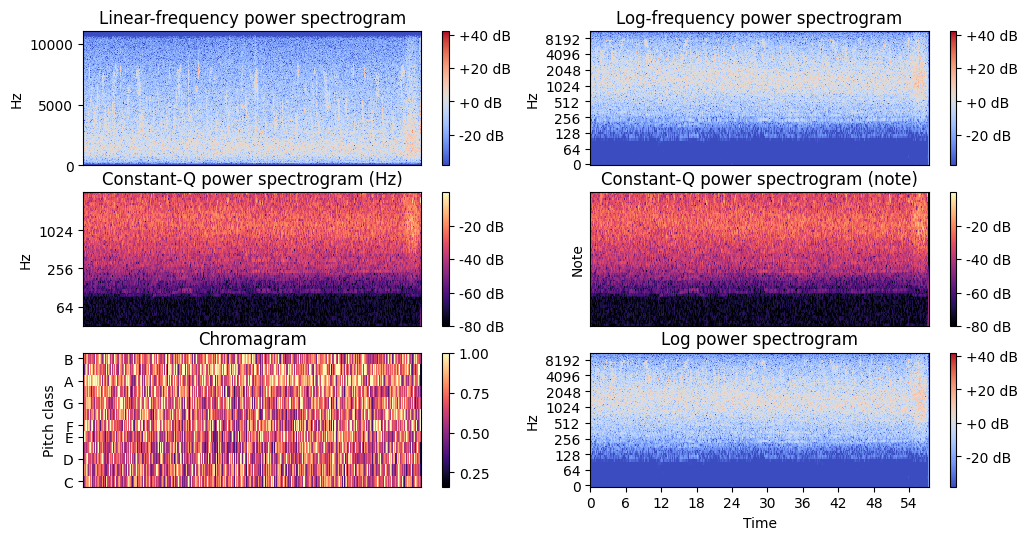

In [15]:
# Visualize an STFT power spectrum

audio_path = '/kaggle/input/birdsong-recognition/train_audio/bawwar/XC134100.mp3'
y, sr = librosa.load(audio_path)
plt.figure(figsize=(12, 8))
D = librosa.amplitude_to_db(librosa.stft(y))
plt.subplot(4, 2, 1)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

# logarithmic scale

plt.subplot(4, 2, 2)
librosa.display.specshow(D, y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Log-frequency power spectrogram')

#CQT scale

CQT = librosa.amplitude_to_db(librosa.cqt(y, sr=sr), ref=np.max)
plt.subplot(4, 2, 3)
librosa.display.specshow(CQT, y_axis='cqt_hz')
plt.colorbar(format='%+2.0f dB')
plt.title('Constant-Q power spectrogram (Hz)')

CQT = librosa.amplitude_to_db(librosa.cqt(y, sr=sr), ref=np.max)
plt.subplot(4, 2, 4)
librosa.display.specshow(CQT, y_axis='cqt_note')
plt.colorbar(format='%+2.0f dB')
plt.title('Constant-Q power spectrogram (note)')

#Chromagram
C = librosa.feature.chroma_cqt(y=y, sr=sr)
plt.subplot(4, 2, 5)
librosa.display.specshow(C, y_axis='chroma')
plt.colorbar()
plt.title('Chromagram')

# Log power spectrogram
plt.subplot(4, 2, 6)
librosa.display.specshow(D, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Log power spectrogram')

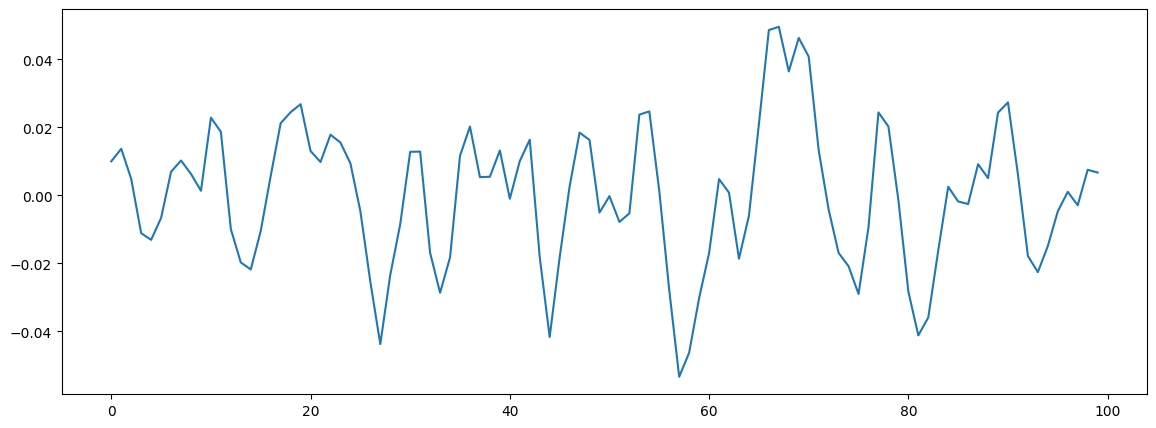

In [16]:
# let's zoom in 
n0 = 7000
n1 = 7100
plt.figure(figsize=(14, 5))
plt.plot(y[n0:n1])

(1, 2469)


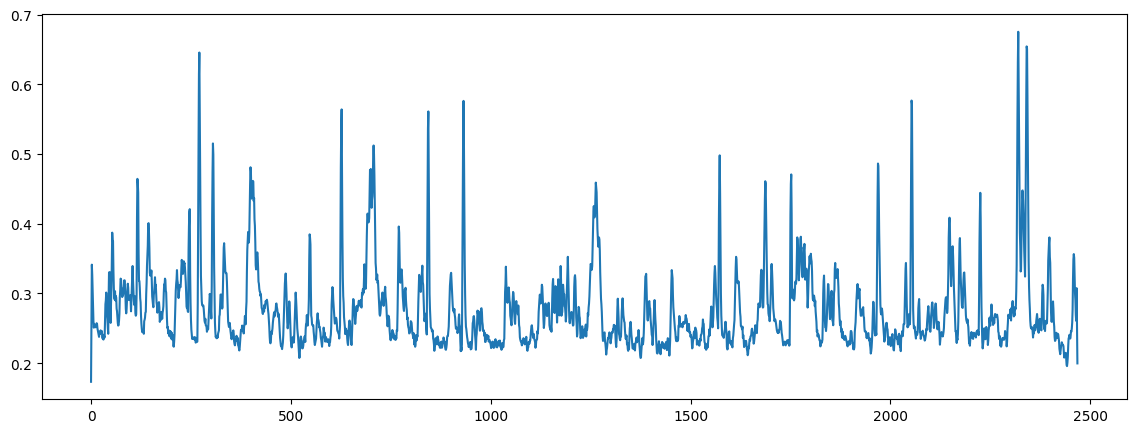

In [17]:
zero_crossings = librosa.zero_crossings(y[n0:n1], pad=False)
zero_crossings.shape
zcrs = librosa.feature.zero_crossing_rate(y)
print(zcrs.shape)
plt.figure(figsize=(14, 5))
plt.plot(zcrs[0])

In [18]:
df.columns

Index(['rating', 'playback_used', 'ebird_code', 'channels', 'date', 'pitch',
       'duration', 'filename', 'speed', 'species', 'number_of_notes', 'title',
       'secondary_labels', 'bird_seen', 'sci_name', 'location', 'latitude',
       'sampling_rate', 'type', 'elevation', 'description', 'bitrate_of_mp3',
       'file_type', 'volume', 'background', 'xc_id', 'url', 'country',
       'author', 'primary_label', 'longitude', 'length', 'time', 'recordist',
       'license', 'year', 'month'],
      dtype='object')

In [19]:
s = (df.dtypes == "object")
list1= list(s[s].index)
print(list1)

['playback_used', 'ebird_code', 'channels', 'date', 'pitch', 'filename', 'speed', 'species', 'number_of_notes', 'title', 'secondary_labels', 'bird_seen', 'sci_name', 'location', 'latitude', 'sampling_rate', 'type', 'elevation', 'description', 'bitrate_of_mp3', 'file_type', 'volume', 'background', 'url', 'country', 'author', 'primary_label', 'longitude', 'length', 'time', 'recordist', 'license', 'year', 'month']


In [20]:
df = df.drop(["filename"  ,"url" ,"ebird_code", "author","sci_name" ,"secondary_labels" ,"xc_id","file_type" ,"description","date"] , axis =1)

In [21]:
for cols in df.columns:
    unique = df[cols].unique()
    print(f"The values are {cols} : {unique}")

The values are rating : [3.5 4.  4.5 5.  3.  2.5 1.5 1.  2.  0.5 0. ]
The values are playback_used : ['no' nan 'yes']
The values are channels : ['1 (mono)' '2 (stereo)']
The values are pitch : ['Not specified' 'both' 'increasing' 'level' 'decreasing']
The values are duration : [  25   36   39   33    7   45   71   26   54  269   31   19    9   29
   13   16  315   46   84  136   22   58   56   23   17   38   72   86
  103  127   41  120   21   42  130   69   60   78  141  188   59   20
  386   82  149   75   70  116   66   83  105   50   62   15   11   73
   35   51   64  245   30   14    6   96  178  177    5    1   10   48
   27   43   98   18  145   28   53  165  122  137   24   55    2   12
  150  146  164  217   65  288  419    0  374   34  214   49    4  111
   61  126  135   57  152   47  200  229   93  262  142  187  113  264
   80   89    8   74  228  300  220  157  132    3  100   99   40   52
  112  158  427  162  119  153   32  441  179   88  212  131   77  144
  101  143  

In [22]:
df.isnull().sum()

rating                 0
playback_used       1800
channels               0
pitch                  0
duration               0
speed                  0
species                0
number_of_notes        0
title                  0
bird_seen           1800
location               0
latitude               0
sampling_rate          0
type                   0
elevation              0
bitrate_of_mp3         8
volume                 0
background         13075
country                0
primary_label          0
longitude              0
length                 0
time                   0
recordist              0
license                0
year                   0
month                  0
dtype: int64

In [23]:
df = df.dropna(axis=0)
df.isnull().sum()

rating             0
playback_used      0
channels           0
pitch              0
duration           0
speed              0
species            0
number_of_notes    0
title              0
bird_seen          0
location           0
latitude           0
sampling_rate      0
type               0
elevation          0
bitrate_of_mp3     0
volume             0
background         0
country            0
primary_label      0
longitude          0
length             0
time               0
recordist          0
license            0
year               0
month              0
dtype: int64

In [24]:
s = (df.dtypes == "object")
list1= list(s[s].index)
print(list1)

['playback_used', 'channels', 'pitch', 'speed', 'species', 'number_of_notes', 'title', 'bird_seen', 'location', 'latitude', 'sampling_rate', 'type', 'elevation', 'bitrate_of_mp3', 'volume', 'background', 'country', 'primary_label', 'longitude', 'length', 'time', 'recordist', 'license', 'year', 'month']


In [25]:
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame
label_encoder = LabelEncoder()
mapping_dict = {}

for column in df.columns:
    df[column] = label_encoder.fit_transform(df[column])
    mapping_dict[column] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Now df is transformed, and mapping_dict contains the mapping information

In [26]:
df

,rating,playback_used,channels,pitch,duration,speed,species,number_of_notes,title,bird_seen,...,background,country,primary_label,longitude,length,time,recordist,license,year,month
0,4,0,0,0,25,0,0,4,694,1,...,429,63,88,2431,4,1076,206,2,26,5
3,4,0,1,1,33,2,0,0,740,1,...,2162,63,88,2060,0,302,292,0,26,5
7,4,0,1,3,71,4,0,0,762,1,...,1580,63,88,2038,0,426,145,0,26,5
9,4,0,0,0,54,0,0,4,857,1,...,834,63,88,2399,4,174,206,2,26,6
10,5,0,0,0,267,0,0,4,878,1,...,1555,63,88,2380,4,208,206,2,26,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21368,5,0,1,0,32,0,257,4,7028,1,...,465,63,248,1710,4,575,414,1,32,5
21370,5,0,0,1,28,4,257,1,7109,1,...,1702,63,248,2147,0,575,372,1,32,5
21371,4,0,0,0,52,0,257,4,7435,1,...,3556,63,248,1829,4,672,168,1,30,5
21373,4,0,1,4,35,4,257,1,7544,1,...,2949,63,248,2140,3,1138,292,0,22,5


In [27]:
mapping_dict

{'rating': {0.0: 0, 0.5: 1, 1.5: 2, 2.5: 3, 3.5: 4, 4.5: 5},
 'playback_used': {'no': 0, 'yes': 1},
 'channels': {'1 (mono)': 0, '2 (stereo)': 1},
 'pitch': {'Not specified': 0,
  'both': 1,
  'decreasing': 2,
  'increasing': 3,
  'level': 4},
 'duration': {0: 0,
  1: 1,
  2: 2,
  3: 3,
  4: 4,
  5: 5,
  6: 6,
  7: 7,
  8: 8,
  9: 9,
  10: 10,
  11: 11,
  12: 12,
  13: 13,
  14: 14,
  15: 15,
  16: 16,
  17: 17,
  18: 18,
  19: 19,
  20: 20,
  21: 21,
  22: 22,
  23: 23,
  24: 24,
  25: 25,
  26: 26,
  27: 27,
  28: 28,
  29: 29,
  30: 30,
  31: 31,
  32: 32,
  33: 33,
  34: 34,
  35: 35,
  36: 36,
  37: 37,
  38: 38,
  39: 39,
  40: 40,
  41: 41,
  42: 42,
  43: 43,
  44: 44,
  45: 45,
  46: 46,
  47: 47,
  48: 48,
  49: 49,
  50: 50,
  51: 51,
  52: 52,
  53: 53,
  54: 54,
  55: 55,
  56: 56,
  57: 57,
  58: 58,
  59: 59,
  60: 60,
  61: 61,
  62: 62,
  63: 63,
  64: 64,
  65: 65,
  66: 66,
  67: 67,
  68: 68,
  69: 69,
  70: 70,
  71: 71,
  72: 72,
  73: 73,
  74: 74,
  75: 75,
  76

In [28]:
df

,rating,playback_used,channels,pitch,duration,speed,species,number_of_notes,title,bird_seen,...,background,country,primary_label,longitude,length,time,recordist,license,year,month
0,4,0,0,0,25,0,0,4,694,1,...,429,63,88,2431,4,1076,206,2,26,5
3,4,0,1,1,33,2,0,0,740,1,...,2162,63,88,2060,0,302,292,0,26,5
7,4,0,1,3,71,4,0,0,762,1,...,1580,63,88,2038,0,426,145,0,26,5
9,4,0,0,0,54,0,0,4,857,1,...,834,63,88,2399,4,174,206,2,26,6
10,5,0,0,0,267,0,0,4,878,1,...,1555,63,88,2380,4,208,206,2,26,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21368,5,0,1,0,32,0,257,4,7028,1,...,465,63,248,1710,4,575,414,1,32,5
21370,5,0,0,1,28,4,257,1,7109,1,...,1702,63,248,2147,0,575,372,1,32,5
21371,4,0,0,0,52,0,257,4,7435,1,...,3556,63,248,1829,4,672,168,1,30,5
21373,4,0,1,4,35,4,257,1,7544,1,...,2949,63,248,2140,3,1138,292,0,22,5


In [29]:
len(df.columns)

27

Model

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression
from sklearn.metrics import classification_report


# Split the data into features (X) and target variable (y)
X = df.drop('species', axis=1)
y = df['species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k_best = SelectKBest(chi2, k=9)

X_train = k_best.fit_transform(X_train, y_train)

X_test= k_best.transform(X_test)



In [39]:
# Create a RandomForestClassifier
model = RandomForestClassifier(n_estimators=100 , random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# score = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
# print(score)

Accuracy: 70.86%


In [34]:
selected_features = X.columns[k_best.get_support()]

# Display the selected features
print("Selected Features:", selected_features)

Selected Features: Index(['title', 'location', 'latitude', 'type', 'bitrate_of_mp3', 'background',
       'primary_label', 'longitude', 'time'],
      dtype='object')


In [35]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=100)
xgb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
# score = classification_report(y_test, y_pred)
# print(score)

Accuracy: 95.66%


In [36]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
# score = classification_report(y_test, y_pred)
# print(score)

Accuracy: 99.87%


In [37]:
from sklearn.model_selection import cross_val_score
xgb_model = XGBClassifier(n_estimators=100)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(xgb_model, X_train , y_train, cv=5, scoring='accuracy')

# Display the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.



Cross-Validation Scores: [0.953125   0.95065789 0.94490132 0.95226337 0.95802469]
Mean Accuracy: 0.9517944552739875


In [44]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=10)
gbc.fit(X_train, y_train)

y_pred = gbc.predict(X_test)

# print("Gradient Boosting Classifier Classification Report:")
# print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 89.54%


Deep Learning model

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression
from sklearn.metrics import classification_report

# Split the data into features (X) and target variable (y)
X = df.drop('species', axis=1)
y = df['species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Feature selection (optional, can be commented out if not needed)
# k_best = SelectKBest(chi2, k=9)  # You can choose chi2 or f_regression
# X_train = k_best.fit_transform(X_train, y_train)
# X_test = k_best.transform(X_test)

# Assuming your features are numerical, convert them to a NumPy array
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

# Reshape features for CNN input (assuming 1D features)
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Convert labels to categorical format for multi-class classification
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Define the ResNet model
model = Sequential([
    Conv1D(32, kernel_size=3, activation="relu", input_shape=(X_train_reshaped.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    # Add residual blocks here (refer to previous examples for structure)
    Flatten(),
    Dense(128, activation="relu"),
    Dense(len(np.unique(y)), activation="softmax")  # Output layer with number of bird species
])

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Train the model
model.fit(X_train_reshaped, y_train_cat, epochs=50, validation_data=(X_test_reshaped, y_test_cat))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_reshaped, y_test_cat)
print(f"Test Accuracy: {accuracy:.4f}")

# Make predictions (optional)
# y_pred = model.predict(X_test_reshaped)
# print(classification_report(y_test, y_pred))


Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



190/190 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.0076 - loss: 89.5717 - val_accuracy: 0.0092 - val_loss: 5.5472
Epoch 2/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0077 - loss: 5.5402 - val_accuracy: 0.0099 - val_loss: 5.5270
Epoch 3/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0115 - loss: 5.5202 - val_accuracy: 0.0099 - val_loss: 5.5160
Epoch 4/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0087 - loss: 5.5060 - val_accuracy: 0.0099 - val_loss: 5.5073
Epoch 5/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0114 - loss: 5.4933 - val_accuracy: 0.0099 - val_loss: 5.5004
Epoch 6/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0109 - loss: 5.4866 - val_accuracy: 0.0099 - val_loss: 5.4932
Epoch 7/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0108 - loss: 5.4763 - val_accuracy: 0.0099 - val_loss: 5.4887
Epoch 8/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0113 - loss: 5.4726 - val_accuracy: 0.0092 - val

 Convolutional LSTM (ConvLSTM) network

In [54]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target variable (y)
X = df.drop('species', axis=1)
y = df['species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Assuming your features are numerical, convert them to a NumPy array
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

# Reshape features for CNN input (assuming 1D features)
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Convert labels to categorical format for multi-class classification
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Define the ConvLSTM model
model = Sequential([
    Conv1D(32, kernel_size=3, activation="relu", input_shape=(X_train_reshaped.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    LSTM(64, return_sequences=True),  # LSTM layer with return_sequences=True
    LSTM(32),  # Another LSTM layer
    Flatten(),
    Dense(128, activation="relu"),
    Dense(len(np.unique(y)), activation="softmax")  # Output layer with number of bird species
])

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Train the model
model.fit(X_train_reshaped, y_train_cat, epochs=50, validation_data=(X_test_reshaped, y_test_cat))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_reshaped, y_test_cat)
print(f"Test Accuracy: {accuracy:.4f}")

# Make predictions (optional)
# y_pred = model.predict(X_test_reshaped)
# print(classification_report(y_test, y_pred))


Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



190/190 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.0066 - loss: 5.5165 - val_accuracy: 0.0132 - val_loss: 5.4141
Epoch 2/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0153 - loss: 5.3749 - val_accuracy: 0.0151 - val_loss: 5.3403
Epoch 3/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0179 - loss: 5.2966 - val_accuracy: 0.0184 - val_loss: 5.2735
Epoch 4/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0226 - loss: 5.1905 - val_accuracy: 0.0250 - val_loss: 5.1981
Epoch 5/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0269 - loss: 5.0753 - val_accuracy: 0.0342 - val_loss: 5.1236
Epoch 6/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.0390 - loss: 4.9147 - val_accuracy: 0.0296 - val_loss: 5.0662
Epoch 7/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0448 - loss: 4.7906 - val_accuracy: 0.0408 - val_loss: 4.9624
Epoch 8/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0524 - loss: 4.7032 - val_accuracy: 0.0467 - val_